### 이미지 블렌딩 게임 제작
1. 데이터 수집(20~30장)
2. crawlingDB 폴더에 접근해서 이미지 확인
3. 이미지 읽기 출력 + 이미지 처리
4. 이미지 이름 영한사전 구축
5. 이미지에 맞는 한국어 단어 출력 알고리즘
6. image 블렌딩 : addWeighted() 2~3장
7. 정답을 입력받아 맞는지 체크하는 알고리즘 작성

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os # 운영체제 - 파일 관리 시스템
from PIL import Image

### Directory 접근하기
- os 모듈(라이브러리) 이용

In [6]:
# os.listdir(경로) : 해당 경로 안에 있는 파일 이름을 출력하는 기능
img_fd = os.listdir('./crawlingDB/')
img_fd

['apple.jpg',
 'cat.jfif',
 'cherry.jpg',
 'doraemon.jfif',
 'grape.jpg',
 'hamburger.jfif',
 'icecream.jfif',
 'jenny.jfif',
 'mango.jpg',
 'mc.jfif',
 'melon.jfif',
 'orange.jpg',
 'pm.jpg',
 'poodle.png',
 'rabbit.jfif',
 'rose.jfif',
 'ryan.jfif',
 'tiger.jfif',
 'tomato.jpg',
 'tteokbokki.jpg',
 'tulip.jfif',
 'watermelon.jpg',
 'zebra.jfif']

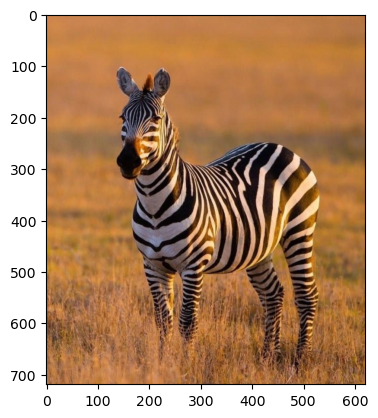

In [7]:
# 특정 이미지 불러와서 출력
# img = cv2.imread('./crawlingDB/zebra.jfif')
img = cv2.imread(f'./crawlingDB/{img_fd[-1]}')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### 정답 데이터 레이블 사전 구축

In [9]:
# 특정 문자 기준으로 나눠주는 함수
# split
name = 'apple.jpg'
name.split('.')[0]

'apple'

In [10]:
# 리스트 내부 모든 요소의 확장자 제거한 후 리스트에 저장
# 문자열에서 분리하는 기능 : split 함수
'''
img_fd2 = []
for name in img_fd:
    img_fd2.append(name.split('.')[0])      반복문으로 리스트에 저장.
img_fd2
'''

img_fd2 = [name.split('.')[0] for name in img_fd]  # 한줄 포문
img_fd2

['apple',
 'cat',
 'cherry',
 'doraemon',
 'grape',
 'hamburger',
 'icecream',
 'jenny',
 'mango',
 'mc',
 'melon',
 'orange',
 'pm',
 'poodle',
 'rabbit',
 'rose',
 'ryan',
 'tiger',
 'tomato',
 'tteokbokki',
 'tulip',
 'watermelon',
 'zebra']

In [11]:
# 영문 이름을 한글로 변환하기
# 1. 영한 번역기, 딥러닝 모델을 연결해서 한국어 문자열 생성
# 2. 노가다
# 3. 복사 + 붙혀넣기 ㅋㅋㅋ

kor_name = ['사과','고양이','체리','도라에몽','포도','햄버거','아이스크림','제니','망고',
            '유재석','메론','오렌지','포메라니안','푸들','토끼','장미','라이언','호랑이','토마토','떡볶이','튤립','수박','얼룩말']
kor_name

['사과',
 '고양이',
 '체리',
 '도라에몽',
 '포도',
 '햄버거',
 '아이스크림',
 '제니',
 '망고',
 '유재석',
 '메론',
 '오렌지',
 '포메라니안',
 '푸들',
 '토끼',
 '장미',
 '라이언',
 '호랑이',
 '토마토',
 '떡볶이',
 '튤립',
 '수박',
 '얼룩말']

In [12]:
print(len(img_fd2))
print(len(kor_name))

23
23


In [13]:
# 데이터 두개 연결하기 zip()

name_dict = dict(zip(img_fd2, kor_name))
name_dict

{'apple': '사과',
 'cat': '고양이',
 'cherry': '체리',
 'doraemon': '도라에몽',
 'grape': '포도',
 'hamburger': '햄버거',
 'icecream': '아이스크림',
 'jenny': '제니',
 'mango': '망고',
 'mc': '유재석',
 'melon': '메론',
 'orange': '오렌지',
 'pm': '포메라니안',
 'poodle': '푸들',
 'rabbit': '토끼',
 'rose': '장미',
 'ryan': '라이언',
 'tiger': '호랑이',
 'tomato': '토마토',
 'tteokbokki': '떡볶이',
 'tulip': '튤립',
 'watermelon': '수박',
 'zebra': '얼룩말'}

In [14]:
# 고양이 데이터에 접근
name_dict['cat'] # 키값으로 접근

'고양이'

In [15]:
name_dict[img_fd2[1]] # 같은 키값으로 접근 > img_fd2의 [1]번 인덱스값을 키값으로.

'고양이'

### 이미지에 맞는 한국어 단어를 출력하는 알고리즘 구성

In [17]:
len(img_fd)

23

In [18]:
rd_int = np.random.randint(0, len(img_fd), size=3)
rd_int

array([12, 19, 12])

In [30]:
# 랜덤으로 이미지 2~3개를 가져오는 알고리즘

ext_img = [] # 이미지의 경로
ext_name = [] # 이미지의 한글이름
random_int = np.random.randint(0,len(img_fd), size=3)
for i in random_int: # size = 3 : 3번 반복
    img_path = f'./crawlingDB/{img_fd[i]}'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    #plt.show()
    
    en_name = img_fd[i].split('.')[0] # 이름 분리
    kor_name = name_dict[en_name] # 한국어 이름 key값으로 가져오기
    ext_img.append(img_path) # 이미지 경로 담기
    ext_name.append(kor_name) # 한국어 이름 담기
print(ext_img)
print(ext_name)

['./crawlingDB/tiger.jfif', './crawlingDB/rose.jfif', './crawlingDB/icecream.jfif']
['호랑이', '장미', '아이스크림']


- 2장 블랜딩 하기

In [32]:
ext_img

['./crawlingDB/tiger.jfif',
 './crawlingDB/rose.jfif',
 './crawlingDB/icecream.jfif']

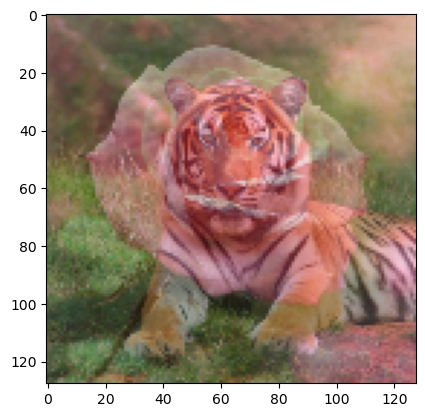

In [37]:
img1 = cv2.imread(ext_img[0])
img2 = cv2.imread(ext_img[1])

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 이미지 크기 동일하게 맞추기
img1 = cv2.resize(img1, dsize=(128,128))
img2 = cv2.resize(img2, dsize=(128,128))

# 블랜딩
img_add = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

# 출력
plt.imshow(img_add)
plt.show()

- 3장 블랜딩

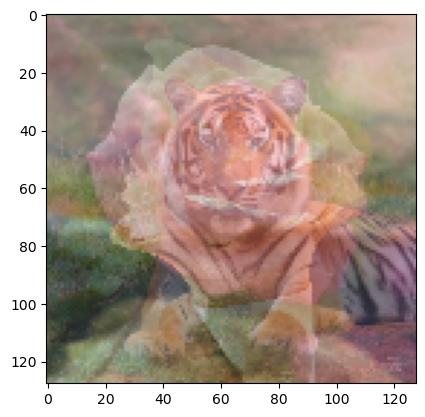

In [66]:
img1 = cv2.imread(ext_img[0])
img2 = cv2.imread(ext_img[1])
img3 = cv2.imread(ext_img[2])

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# 이미지 크기 동일하게 맞추기
img1 = cv2.resize(img1, dsize=(128,128))
img2 = cv2.resize(img2, dsize=(128,128))
img3 = cv2.resize(img3, dsize=(128,128))


# 블렌딩
'''
img_add = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
img_add = cv2.addWeighted(img3, 0.4, img_add, 0.6, 0)
'''

# Numpy 배열 연산으로 블렌딩
# 가중치
w1 = 0.3333
img_add = (img1*w1 + img2*w1 + img3*w1).astype(np.uint64)

# 출력
plt.imshow(img_add)
plt.show()

- 이미지 블렌딩 함수 정의

In [69]:
# 함수화
def add_img(ext_img, size):
    if size == 2:
        img1 = cv2.imread(ext_img[0])
        img2 = cv2.imread(ext_img[1])
        
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        
        # 이미지 크기 동일하게 맞추기
        img1 = cv2.resize(img1, dsize=(128,128))
        img2 = cv2.resize(img2, dsize=(128,128))
        
        # 블랜딩
        img_add = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
        
        # 출력
        plt.imshow(img_add)
        plt.show()
    elif size == 3:
        img1 = cv2.imread(ext_img[0])
        img2 = cv2.imread(ext_img[1])
        img3 = cv2.imread(ext_img[2])
        
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
        
        # 이미지 크기 동일하게 맞추기
        img1 = cv2.resize(img1, dsize=(128,128))
        img2 = cv2.resize(img2, dsize=(128,128))
        img3 = cv2.resize(img3, dsize=(128,128))
        
        
        # 블렌딩
        '''
        img_add = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
        img_add = cv2.addWeighted(img3, 0.4, img_add, 0.6, 0)
        '''
        
        # Numpy 배열 연산으로 블렌딩
        # 가중치
        w1 = 0.3333
        img_add = (img1*w1 + img2*w1 + img3*w1).astype(np.uint64)
        
        # 출력
        plt.imshow(img_add)
        plt.show()

이미지 블렌딩 장수 선택(2or3) 2


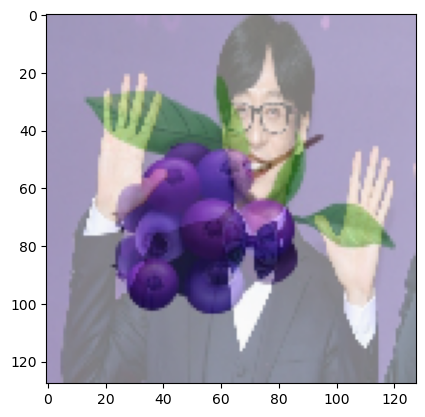

['포도', '유재석']


In [73]:
input_size = int(input('이미지 블렌딩 장수 선택(2or3)'))
if input_size < 4:
    ext_img = [] # 이미지의 경로
    ext_name = [] # 이미지의 한글이름
    random_int = np.random.randint(0,len(img_fd), size = input_size)
    for i in random_int: # size = input_size : input_size번 반복
        img_path = f'./crawlingDB/{img_fd[i]}'
        
        en_name = img_fd[i].split('.')[0] # 이름 분리
        kor_name = name_dict[en_name] # 한국어 이름 key값으로 가져오기
        ext_img.append(img_path) # 이미지 경로 담기
        ext_name.append(kor_name) # 한국어 이름 담기
    add_img(ext_img, input_size)
    print(ext_name)

### 출력된 블렌딩 결과 이미지를 보며 맞추기
- 사용자로부터 단어를 ,로 구분하여 한번에 입력받기
- 입력받은 단어를 ',' 구분자로 나눠서 user_input 리스트에 담기
- user_input의 길이가 size랑 같을 경우에만 실행
- 사용자가 입력한 단어가 ext_name안에 있다면 cnt 1 증가

In [76]:
ext_name

['포도', '유재석']

In [80]:
def result(input_size):
    user_input = input('합쳐진 이미지 장수에 맞춰서 단어를 ,로 구분하여 입력해주세요 >>').split(',')
    cnt = 0
    if len(user_input) == input_size:
        for i in user_input:
            # 실제 정답 리스트 ext_name
            if i.strip() in ext_name: # 정답일때
                cnt += 1
        if cnt != input_size:
            print('틀렸습니다')
            return 0
        else:
            print('정답입니다')
            return 1
    else:
        print('잘못된 입력입니다.')
        return 0

In [82]:
result(2)

합쳐진 이미지 장수에 맞춰서 단어를 ,로 구분하여 입력해주세요 >> 포도,유재석


정답입니다


1

- 가벼운 게임 기획
1. 게임 실행시 이미지 블렌딩 시작문구 출력
2. 블렌딩할 이미지 장수 입력받기(난이도)
3. 블렌딩 이미지 결과 띄우기
4. 정답 입력창 띄우기
5. 맞출경우, 틀릴경우 출력
6. 정답을 맞출경우, 재시작 여부 묻기
7. 틀릴경우, 재도전 기회

이미지 블렌딩 게임


이미지 블렌딩 장수 선택(2 or 3) >> : 3


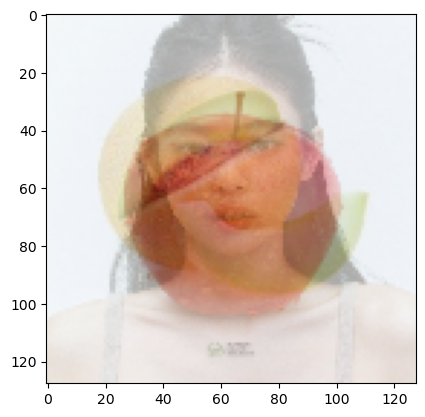

합쳐진 이미지 장수에 맞춰서 단어를 ,로 구분하여 입력해주세요 >> 제니,메론,사과


정답입니다



[s] 게임 다시 시작 [q] 종료 >> s


이미지 블렌딩 게임


이미지 블렌딩 장수 선택(2 or 3) >> : 3


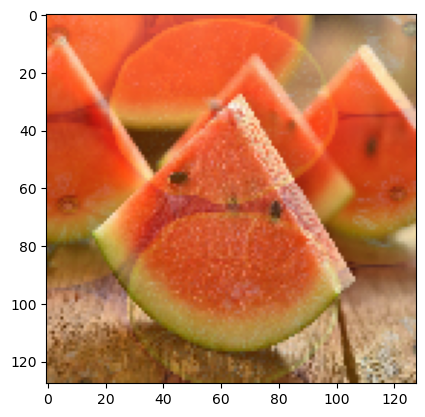

In [ ]:
while True:
    print('이미지 블렌딩 게임')
    input_size = int(input('이미지 블렌딩 장수 선택(2 or 3) >> :'))
    if input_size < 4: # 3 이하일때만 실행
        ext_img = []
        ext_name = []
        rd_int = np.random.randint(0, len(img_fd), size=input_size)
        for i in rd_int:
            img_path = f'./crawlingDB/{img_fd[i]}'
            en_name = img_fd[i].split('.')[0]
            ko_name = name_dict[en_name]
            ext_img.append(img_path)
            ext_name.append(ko_name)
        # 문제
        add_img(ext_img, input_size)
        # 정답 체크
        cnt = result(input_size)
        print()
        wrong_cnt = 3 # 재도전 횟수
        while cnt != 1:
            # 틀렸다면
            print(f'맞출 수 있는 남은 횟수 : {wrong_cnt}')
            wrong_cnt -= 1 # 재도전 기회 차감
            cnt = result(input_size)
            if cnt == 1 or wrong_cnt <=0:
                break
            print()
        ch = input('[s] 게임 다시 시작 [q] 종료 >>')
        if ch == 'q':
            print('이미지 블렌딩 게임 종료')
            print()
            break